<a href="https://colab.research.google.com/github/tmckim/materials-fa23-colab-working/blob/main/lectures/lec07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Before you start - Save this notebook!

When you open a new Colab notebook from the WebCampus (like you hopefully did for this one), you cannot save changes. So it's  best to store the Colab notebook in your personal drive `"File > Save a copy in drive..."` **before** you do anything else.

The file will open in a new tab in your web browser, and it is automatically named something like: "**Copy of lec07.ipynb**". You can rename this to just the title of the assignment "**lec07.ipynb**". Make sure you do keep an informative name (like the name of the assignment) so that you know which files to submit back to WebCampus for grading! More instructions on this are at the end of the notebook.


**Where does the notebook get saved in Google Drive?**

By default, the notebook will be copied to a folder called “Colab Notebooks” at the root (home directory) of your Google Drive. If you use this for other courses or personal code notebooks, I recommend creating a folder for this course and then moving the assignments AFTER you have completed them.

In [ ]:
# Setup and add files needed to gdrive
# If you restart colab, start by rerunning this cell first!
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

#!mkdir -p '/content/gdrive/My Drive/colab-materials-NS499DataSci-notebooks/'
%cd /content/gdrive/My Drive/colab-materials-NS499DataSci-notebooks/
!rm -r materials-fa23-colab-working

!git clone https://github.com/tmckim/materials-fa23-colab-working '/content/gdrive/My Drive/colab-materials-NS499DataSci-notebooks/materials-fa23-colab-working/'

%cd /content/gdrive/MyDrive/colab-materials-NS499DataSci-notebooks/materials-fa23-colab-working/lectures/

In [ ]:
############### TEST
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

%cd /content/gdrive/MyDrive/colab-materials-NS499DataSci-notebooks/materials-fa23-colab-working/lectures/

In [ ]:

# Import packages and other things needed
# Don't change this cell; Just run this cell
# If you restart colab, make sure to run this cell again after the first one above^

from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore',category=np.VisibleDeprecationWarning)


## For statements

In [ ]:
for pet in make_array('cat', 'dog', 'rabbit'):
    print('I love my ' + pet)

In [ ]:
temporary = make_array('cat', 'dog', 'rabbit')

pet = temporary.item(0)
print('I love my ' + pet)

pet = temporary.item(1)
print('I love my ' + pet)

pet = temporary.item(2)
print('I love my ' + pet)

In [ ]:
for i in np.arange(5):
    print(i)

In [ ]:
for i in np.arange(5):
    print('Go Bears')

In [ ]:
s = make_array(2, 3)
np.append(s, 4)
s

In [ ]:
s + 3
s

In [ ]:
s = np.append(s, 4)
s

In [ ]:
result = make_array(2, 3, 4)
for i in np.arange(5):
    result = np.append(result, 10 * i)
result

## Simulation

In [ ]:
# 50/50 chance of outcomes
coin = make_array('heads', 'tails')

In [ ]:
np.random.choice(coin)

'heads'

Multiple coin flips at once:

In [ ]:
# Add second argument to specify # of times
# Saved into an array
np.random.choice(coin,10)

array(['tails', 'heads', 'tails', 'tails', 'heads', 'tails', 'tails',
       'heads', 'tails', 'heads'],
      dtype='<U5')

How many heads did we get in this set of 10?

In [ ]:
# Show the array and then sum them
np.random.choice(coin, 10) == 'heads'

array([False,  True, False, False, False,  True, False,  True,  True,  True], dtype=bool)

Create a function to do this many more times so you do not have to keep rerunning the code

In [ ]:
# Simulate one outcome

def num_heads(n):
    return sum(np.random.choice(coin, n) == 'heads')

## Simulating heads in 100 versus 1000 coin tosses

Setup how many times here

In [ ]:
# Appending to the array
outcomes = make_array()
outcomes = np.append(outcomes, num_heads(1))
outcomes

array([ 0.,  0.])

In [ ]:
# Decide how many times you want to repeat the experiment
repetitions = 1000

Create a for loop

In [ ]:
# Simulate that many outcomes
outcomes = make_array()

for i in np.arange(repetitions):
    outcomes = np.append(outcomes, num_heads(100))


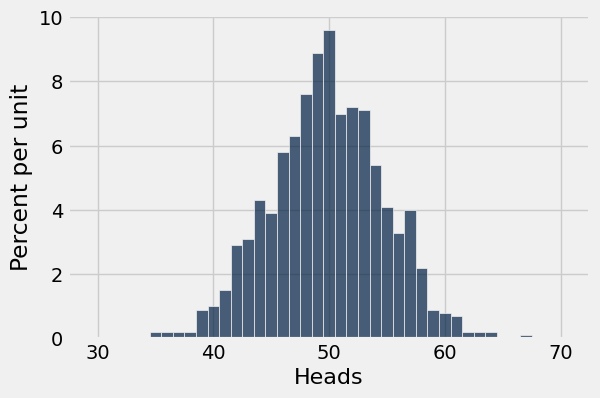

In [ ]:
# Put data into table and plot histogram
heads = Table().with_column('Heads', outcomes)
heads.hist(bins = np.arange(29.5, 70.6))

## Chance/Probability

Box contains playing cards labeled Ace, King, and Queen. I **draw two cards at random without replacement**.

### Chance of two events both occurring ###
What is the chance that I get a Queen followed by a King?

**Equally Likely Outcomes**: Start by writing out the outcomes:

In [ ]:
# 6 possible outcomes and all equally likely
AK, AQ, QK, QA, KQ, KA

Our event is that Q is first, K is second - there is 1 possible outcome. Take this and divide by the total of outcomes- 6

In [ ]:
# Answer:
1/6

**Multiplication Rule**: What is the chance that I get a Queen followed by a King?

Multiplication: First draw: A K Q <br>
Probability that Q is first- 1/3 <br>
Queen is now removed, only Ace and King left. <br>
Chance of getting K second, given we already took out the Q <br>
Now there are 2 possible outcomes- 1/2

Two separate events and found the probability of each and now we can multiply

In [ ]:
# Q first * K is second, given Q was first
1/3 * 1/2

0.16666666666666666

### Chance of an event that can happen in multiple ways ###
What is the chance that one of the cards I draw is a King and the other is Queen?

Can use **equally likely outcomes**: <br>
Don't care about the order, and so find the options where you have both King and a Queen. <br>
Answer: 2/6


**Multiplication Rule** also works by thinking about the two ways to get to these cards being drawn: <br>
Q followed by K - we did that above = 1/3 * 1/2 = 1/6 <br>
K followed by Q - same thing = 1/3 * 1/2 = 1/6 <br>
Answer: 2/6

### Challenge Question 2 ###

I have a deck of 52 cards. It contains four aces, one of which is the ace of hearts.

I shuffle the deck and deal 13 cards.

**Without calculation:** What is the chance that the 12th card is the ace of hearts?

### The Monty Hall Problem ###

Here we simulate the Monty Hall Problem by breaking it down into 3 steps.

1. Simulate the prize behind the door we picked (the only chance event):

In [ ]:
# Make an array of the 3 prize options
prizes = make_array('goat', 'goat', 'car')

In [ ]:
# Make a table of potential outcomes of my choice
N = 10000
outcomes = Table().with_column('My Choice', np.random.choice(prizes, N))
outcomes

My choice
car
car
goat
goat
car
car
car
car
goat
car


2. Then Monty Hall reveals a goat behind one of the other doors.

In [ ]:
# Monty Hall always reveals a goat- add column to table
outcomes = outcomes.with_column("Monty's Door", "goat")
outcomes

My choice,Monty's Door
car,goat
car,goat
goat,goat
goat,goat
car,goat
car,goat
car,goat
car,goat
goat,goat
car,goat


3. Finally we compute the prize behind the remaining door. Since Monty revealed one of the goats, the prize behind the remaining door depends only on our initial choice. If we picked a car, then the remaining door has a goat. Otherwise it has a car.

In [ ]:
# Simple function to choose the opposite of what I have chosen (only prize option left)
def other_door(my_choice):
    if my_choice == "car":
        return "goat"
    else:
        return "car"

In [ ]:
# Use apply to apply the function to the my choice column and create a new column
outcomes = outcomes.with_column(
    "Other Door", outcomes.apply(other_door, "My Choice"))
outcomes

My choice,Monty's Door,Other Door
car,goat,goat
car,goat,goat
goat,goat,car
goat,goat,car
car,goat,goat
car,goat,goat
car,goat,goat
car,goat,goat
goat,goat,car
car,goat,goat


Notice that in the above table each row has two goats and a car. Each row simulates an outcome of playing the game.

If we stayed with our initial choice how often would we get a car?

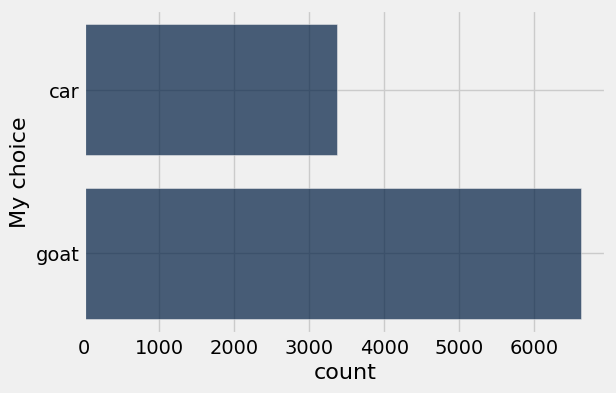

In [ ]:
outcomes.group("My Choice").barh("My Choice")

If we switched to the Other door how often would we win?

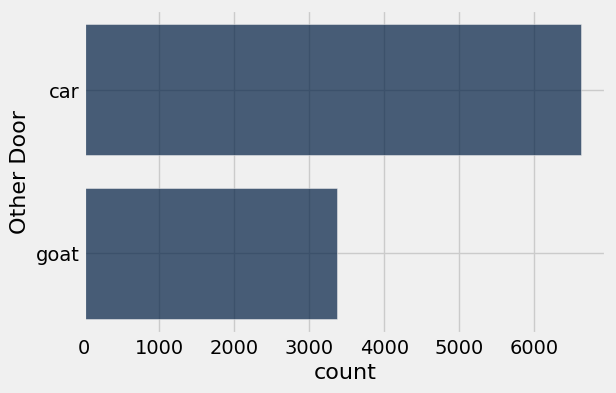

In [ ]:
outcomes.group("Other Door").barh("Other Door")

## Get counts with `group` and then `join` tables to plot

In [ ]:
original_choice = outcomes.group('My Choice')
original_choice

Guess,count
car,3370
first goat,3328
second goat,3302


In [ ]:
remaining_door = outcomes.group('Other Door')
remaining_door

Remaining,count
car,6630
first goat,1679
second goat,1691


In [ ]:
joined = original_choice.join('My Choice', remaining_door, 'Other Door')
combined = joined.relabeled(0, 'Item').relabeled(1, 'Original Door').relabeled(2, 'Remaining Door')
combined

Item,Original Door,Remaining Door
car,3370,6630
first goat,3328,1679
second goat,3302,1691


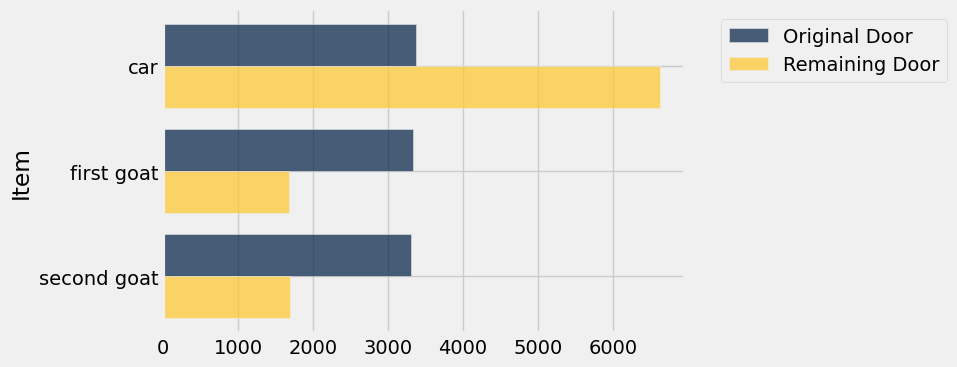

In [ ]:
combined.barh(0)

## Textbook Code Version

In [ ]:
goats = make_array('first goat', 'second goat')

In [ ]:
def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

In [ ]:
[other_goat('first goat'), other_goat('second goat')]

['second goat', 'first goat']

In [ ]:
hidden_behind_doors = np.append(goats, 'car')
hidden_behind_doors

array(['first goat', 'second goat', 'car'],
      dtype='<U11')

In [ ]:
def monty_hall_game():
    """Return
    [contestant's guess, what Monty reveals, what remains behind the other door]"""

    contestant_guess = np.random.choice(hidden_behind_doors)

    if contestant_guess == 'first goat':
        return [contestant_guess, 'second goat', 'car']

    if contestant_guess == 'second goat':
        return [contestant_guess, 'first goat', 'car']

    if contestant_guess == 'car':
        revealed = np.random.choice(goats)
        return [contestant_guess, revealed, other_goat(revealed)]

In [ ]:
monty_hall_game()

['car', 'second goat', 'first goat']

In [ ]:
games = Table(['Guess', 'Revealed', 'Remaining'])

for i in np.arange(10000):
    games.append(monty_hall_game())


In [ ]:
games.show(3)

Guess,Revealed,Remaining
second goat,first goat,car
second goat,first goat,car
first goat,second goat,car


In [ ]:
original_choice = games.group('Guess')
original_choice

Guess,count
car,3370
first goat,3328
second goat,3302


In [ ]:
remaining_door = games.group('Remaining')
remaining_door

Remaining,count
car,6630
first goat,1679
second goat,1691


In [ ]:
joined = original_choice.join('Guess', remaining_door, 'Remaining')
combined = joined.relabeled(0, 'Item').relabeled(1, 'Original Door').relabeled(2, 'Remaining Door')
combined

Item,Original Door,Remaining Door
car,3370,6630
first goat,3328,1679
second goat,3302,1691


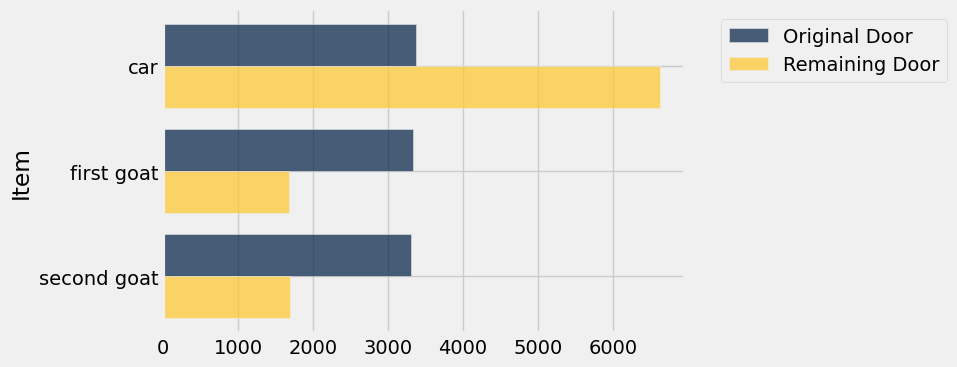

In [ ]:
combined.barh(0)